In [1]:
import numpy as np
from cmocean import cm
import matplotlib.pyplot as plt

from nansat.nansat import Nansat
from nansat.domain import Domain
from nansat.nansatmap import Nansatmap

In [2]:
fn = '/vagrant/shared/test_data/cmems/GLOBAL_ANALYSIS_FORECAST_BIO_001_014-TDS-x-180-X179.5-y-89-Y90-20170520-20170527.nc'
n = Nansat(fn, netcdf_dim={'time': np.datetime64('2017-05-25')})

In [3]:
d = Domain('+proj=stere +lon_0=-89 +lat_0=25 +no_defs',
           '-te -1000000 -1000000 1000000 800000 -tr 10000 10000')
n.reproject(d)

In [4]:
# Create map of mole concentration of Phytoplankton
nmap = Nansatmap(n, resolution='l')
nmap.imshow(n['PHYC'], cmap=cm.algae)
nmap.drawmeridians(np.arange(-20, 100, 30), labels=[False,False,True,False])
nmap.drawparallels(np.arange(60, 90, 5), labels=[True, False, False, False])
nmap.add_colorbar()
nmap.save('phyc_glob_map.png', dpi=300)
# Create map of Chl concentration mg per m2
nmap = Nansatmap(n, resolution='l')
nmap.imshow(n['CHL'], cmap=cm.algae)
nmap.drawmeridians(np.arange(-20, 100, 30), labels=[False,False,True,False])
nmap.drawparallels(np.arange(60, 90, 5), labels=[True, False, False, False])
nmap.add_colorbar()
nmap.save('chl_glob_map.png', dpi=300)

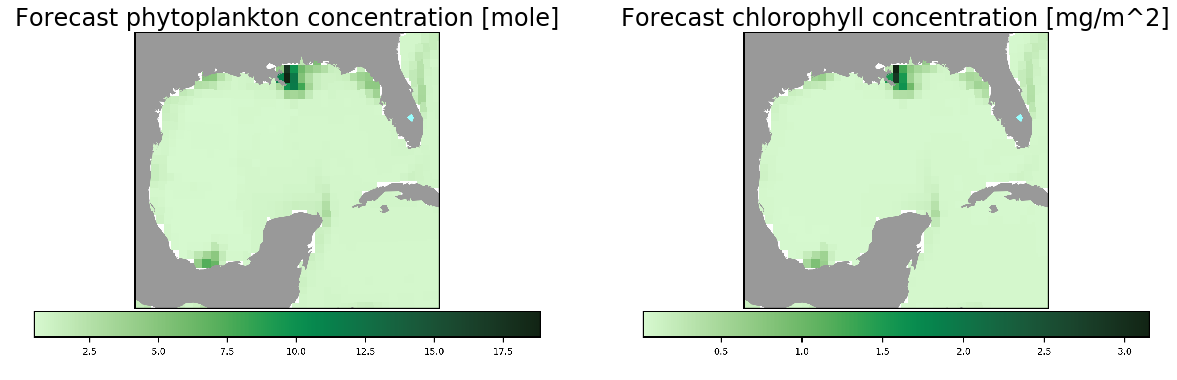

In [5]:
plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(plt.imread('phyc_glob_map.png'))
ax[0].axis('off')
ax[0].set_title('Forecast phytoplankton concentration [mole]', fontsize=24)
ax[1].imshow(plt.imread('chl_glob_map.png'))
ax[1].axis('off')
ax[1].set_title('Forecast chlorophyll concentration [mg/m^2]', fontsize=24)
plt.show()